# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [1]:
# import libraries here

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [2]:
# your code here

#### Print `temp`.

In [3]:
# your code here

#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [4]:
# your code here

In [5]:
"""
your comments here
"""

'\nyour comments here\n'

#### Select the rows where state is New York.

In [6]:
# your code here

#### What is the average temperature of cities in New York?

In [7]:
# your code here

#### Which states and cities have a temperature above 15 degrees Celsius?

In [8]:
# your code here

#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [9]:
# your code here

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [10]:
# your code here

#### Find the mean and standard deviation of the temperature of each state.

In [11]:
# your code here

# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [12]:
# your code here

#### Explore the data types of the `employees` dataframe. Comment your results.

In [13]:
# your code here

In [14]:
"""
your comments here
"""

'\nyour comments here\n'

#### What's the average salary in this company?

In [15]:
# your code here

#### What's the highest salary?

In [16]:
# your code here

#### What's the lowest salary?

In [17]:
# your code here

#### Who are the employees with the lowest salary?

In [18]:
# your code here

#### Find all the information about an employee called David.

In [19]:
# your code here

#### Could you return only David's salary?

In [20]:
# your code here

#### Print all the rows where job title is associate.

In [21]:
# your code here

#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [22]:
# Method 1
# your code here

In [23]:
# Method 2
# your code here

#### Find the employees whose title is associate and whose salary is above 55.

In [24]:
# your code here

#### Group the employees by number of years of employment. What are the average salaries in each group?

In [25]:
# your code here

####  What is the average salary per title?

In [26]:
# your code here

####  Find the salary quartiles.


In [27]:
# your code here

#### Is the mean salary different per gender?

In [28]:
# your code here

#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [29]:
# your code here

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [30]:
# your code here

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [31]:
# your code here
import pandas as pd

df = pd.read_csv("orders.zip")
df.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [32]:
# your code here
df.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [33]:
df.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [34]:
"""
your comments here

There seem to exist ~400k entries in this table. 
Data seems to be related to the years of 2010 and 2011. 
25% of sales happen in the 12th month, while the first 8 months only account for 50% of the sales.
Data seems to be missing for days of the month above 7.
Store seems to operate only between 6h and 20h.
Quantity has a high standard deviance, seems to be positively skewed.
UnitPrice tends to be low, with 75% of observations bellow 3.75 currency units, has a high std and seems to be positively skewed.
My observations for amount_spent are the same as for the previous attribute. 

"""

'\nyour comments here\n\nThere seem to exist ~400k entries in this table. \nData seems to be related to the years of 2010 and 2011. \n25% of sales happen in the 12th month, while the first 8 months only account for 50% of the sales.\nData seems to be missing for days of the month above 7.\nStore seems to operate only between 6h and 20h.\nQuantity has a high standard deviance, seems to be positively skewed.\nUnitPrice tends to be low, with 75% of observations bellow 3.75 currency units, has a high std and seems to be positively skewed.\nMy observations for amount_spent are the same as for the previous attribute. \n\n'

####  What is the average purchase price?

In [35]:
# your code here
# sums numerical for each distinct InvoiceNo
purchase_df = df.groupby("InvoiceNo").sum()
purchase_df["amount_spent"].mean()

480.7621873111767

#### What are the highest and lowest purchase prices? 

In [36]:
# your code here
purchase_df["amount_spent"].describe()

count     18536.000000
mean        480.762187
std        1678.029352
min           0.000000
25%         157.930000
50%         303.020000
75%         471.660000
max      168469.600000
Name: amount_spent, dtype: float64

In [37]:
'''
Largest purchase is 168469.60, smallest 0.
'''

'\nLargest purchase is 168469.60, smallest 0.\n'

#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [38]:
# your code here
spain_custm_df = df.loc[df['Country'] == 'Spain', 'CustomerID']
spain_custm_df

4250      12557
4251      12557
4252      12557
4253      12557
4254      12557
          ...  
394733    17097
394734    17097
394735    17097
394736    17097
394737    17097
Name: CustomerID, Length: 2485, dtype: int64

#### How many customers do we have in Spain?

In [39]:
# your code here
len(spain_custm_df.unique())

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [40]:
# your code here
client_df = df.groupby("CustomerID").sum()
client_df.head()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,amount_spent
CustomerID,,,,,,,,,
12346,61619,541431,2011,1,2,10,74215,1.04,77183.60
12347,42441700,101296926,365971,1383,441,2219,2458,481.21,4310.00
12348,2807120,16869685,62324,257,111,472,2341,178.71,1797.24
12349,35444274,42165457,146803,803,73,657,631,605.10,1757.55
12350,1365627,9231629,34187,34,51,272,197,65.30,334.40


In [41]:
over_50_df = df.loc[df['Quantity'] > 50]
over_50_df.head()


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Select orders from Spain that include more than 50 items.

In [42]:
# your code here
es_over_50_df = over_50_df.loc[over_50_df['Country'] == 'Spain']
es_over_50_df.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders.

In [43]:
# your code here
free_df = purchase_df.loc[purchase_df['amount_spent'] == 0]
free_df.head(10)

,Unnamed: 0,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
InvoiceNo,,,,,,,,,
543599,86789,2011,2,4,13,16,0.0,17560,0.0
564651,1258986,8044,32,20,56,576,0.0,58584,0.0
568384,361825,2011,9,2,9,1,0.0,12748,0.0
578841,502122,2011,11,5,15,12540,0.0,13256,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [56]:
# your code here
temp_2w = []
for i in df["Description"]:
    i = str(i).split(" ")
    two_w = " ".join(i[:2])
    if two_w == "lunch bag":
        temp_2w.append(True)
    else:
        temp_2w.append(False)

lbag_df = df
lbag_df["lunch bag"] = temp_2w
lbag_df = lbag_df.loc[lbag_df['lunch bag'] == True]
lbag_df

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,lunch bag
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50,True
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50,True
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65,True
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65,True
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50,True
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65,True
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65,True
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50,True


#### Select all `lunch bag` orders made in 2011.

In [58]:
# your code here
lbag_df.loc[lbag_df['year'] == 2011]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,lunch bag
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50,True
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50,True
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30,True
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65,True
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50,True
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65,True
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65,True
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50,True


#### Show the frequency distribution of the amount spent in Spain.

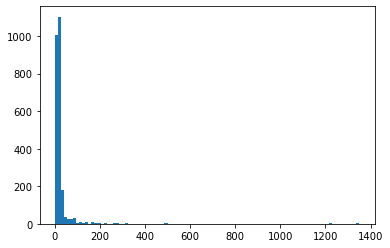

4250    115.5
4251    145.0
4252     99.0
4253    115.5
4254    145.0
Name: amount_spent, dtype: float64

In [70]:
# your code here
import matplotlib.pyplot as plt
plt.hist(df.loc[df['Country'] == 'Spain']['amount_spent'], bins = 100)
plt.show()
df.loc[df['Country'] == 'Spain']['amount_spent'].head()

#### Select all orders made in the month of August.

In [71]:
# your code here
df.loc[df['month'] == 8]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,lunch bag
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20,False
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36,False
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40,False
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40,False
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90,False
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90,False
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10,False
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90,False


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [73]:
# your code here
df.loc[df['month'] == 8]['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country?

In [76]:
# your code here
df.groupby("Country")['amount_spent'].mean()


Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [77]:
# your code here
df['UnitPrice'].max()

8142.75

#### What is the average amount spent per year?

In [80]:
# your code here
df.groupby("year")['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64